In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data maker

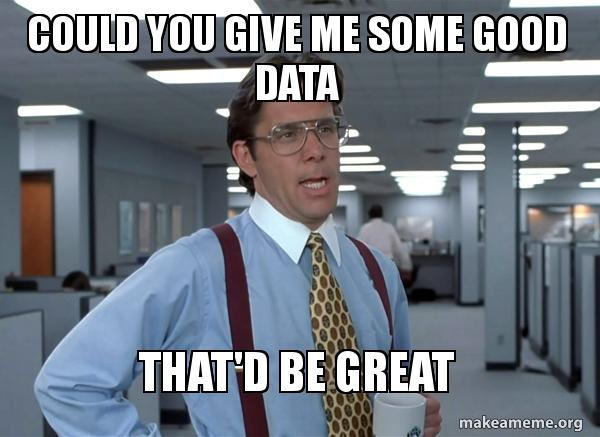

In [6]:
df_names = pd.read_excel("most-popular-baby-names-2005-current-3.xlsx")
df_names.head()


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Year,Gender,Name,COUNT
0,1,2018,Female,EMMA,2700
1,2,2018,Female,MIA,2485
2,3,2018,Female,OLIVIA,2444
3,4,2018,Female,ISABELLA,2182
4,5,2018,Female,SOPHIA,2144


In [7]:
def generate_data(N):

  random_names = np.random.permutation(df_names["Name"])
  return {"Name": [np.NaN if prob < 0.1 else random_names[np.random.randint(len(random_names))] for i, prob in enumerate(np.random.laplace(size=N))],
          "Gender": [np.NaN if prob < 0.25 else ("m" if prob < 0.5 else ("f" if prob < 0.75  else "u")) for i, prob in  enumerate(np.random.laplace(size=N))],
          "Salary": [np.NaN if prob < 0.1 else np.random.randint(1000, 300000) for i, prob in  enumerate(np.random.laplace(size=N))],
          "Age": [np.NaN if prob < 0.1 else np.random.randint(16, 130) for i, prob in  enumerate(np.random.laplace(size=N))]


          }

In [8]:
N=1000

data = generate_data(N)

In [9]:
# Part 1: Common Data Problems
df = pd.DataFrame(data)

In [ ]:
# Analyze NaN values
nan_count_before = df.isna().sum()
names_count_before = df.groupby("Name").count().sum()
gender_count_before = df.groupby("Gender").count().sum()
salary_count_before = df.groupby("Salary").count().sum()
age_count_before = df.groupby("Age").count().sum()



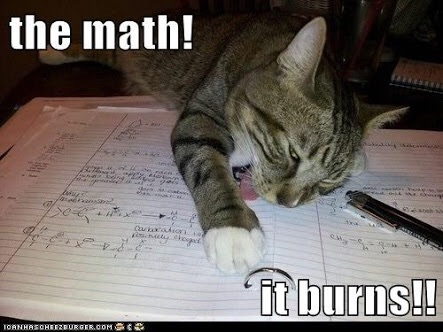

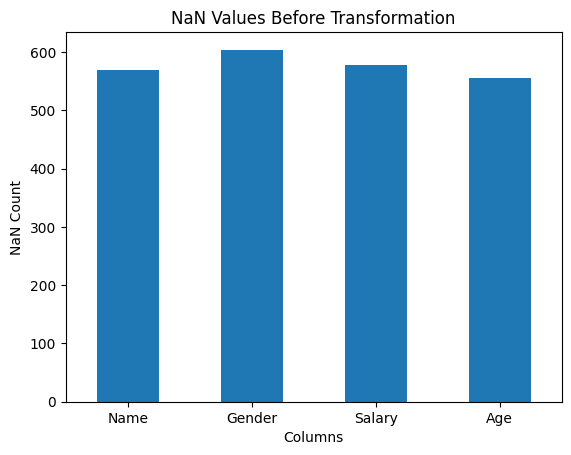

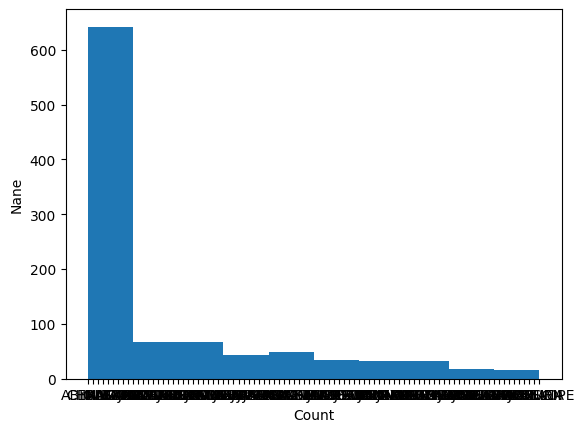

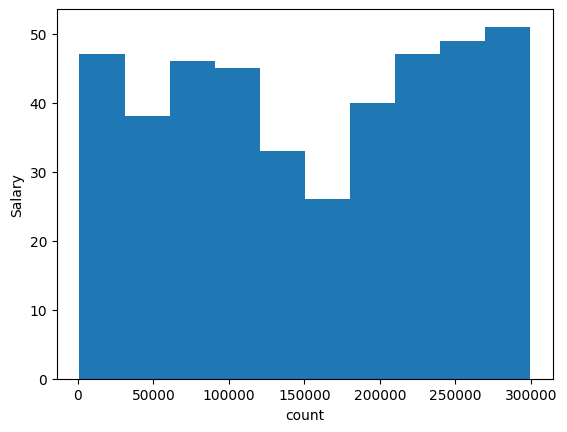

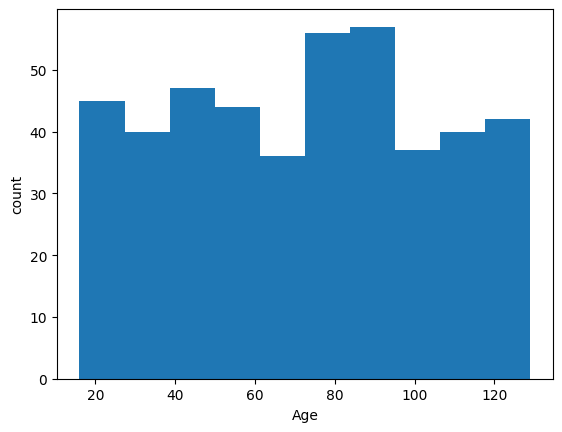

In [10]:

# Create a bar plot to compare NaN values before transformation
plt.figure()
nan_count_before.plot(kind='bar', title='NaN Values Before Transformation')
plt.xlabel('Columns')
plt.ylabel('NaN Count')
plt.xticks(rotation=0)
plt.show()


# Create a bar plot to compare NaN values before transformation
plt.figure()
plt.hist(data["Name"], )
plt.xlabel('Count')
plt.ylabel('Nane')
plt.xticks(rotation=0)
plt.show()

# Create a bar plot to compare NaN values before transformation
plt.figure()
plt.hist(data["Salary"])
plt.xlabel('count')
plt.ylabel('Salary')
plt.xticks(rotation=0)
plt.show()


# Create a bar plot to compare NaN values before transformation
plt.figure()
plt.hist(data["Age"])
plt.xlabel('Age')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

<Figure size 640x480 with 0 Axes>

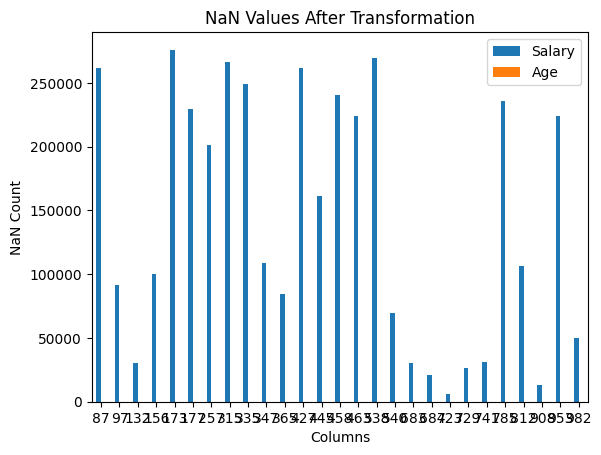

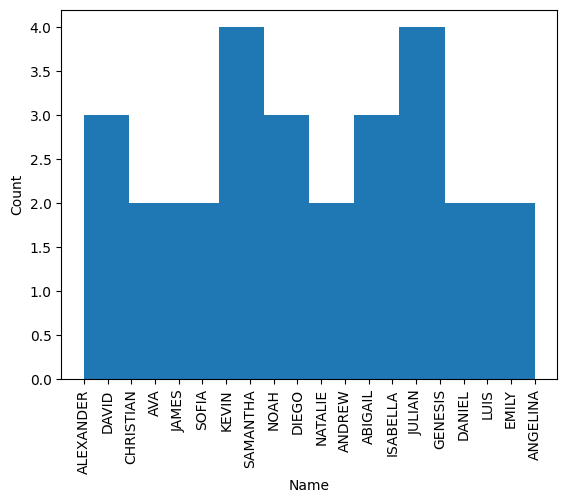

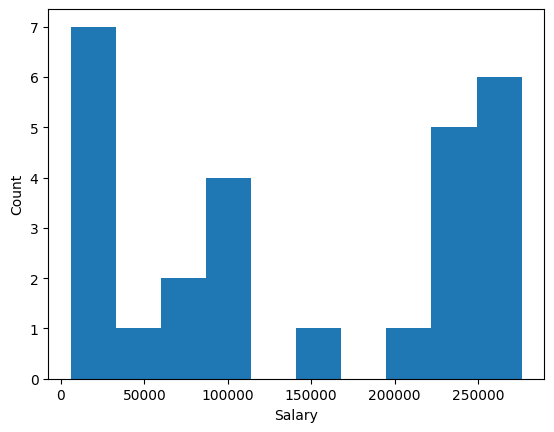

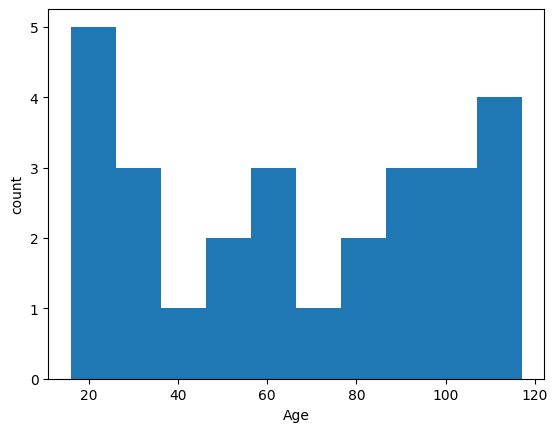

In [13]:
df_transformed = df
# Method 1: Drop missing values
df_transformed = df.dropna()

# Method 2: Fill missing values with a specific value (e.g., 0)
#df_transformed = df.fillna(0)

# Method 3: Forward fill missing values (use the previous value to fill)
#df_transformed = df.ffill()

# Method 4: Backward fill missing values (use the next value to fill)
#df_transformed = df.bfill()

# Method 5: Interpolate missing values (fill using linear interpolation)
#df_transformed = df.interpolate()

# Display the original and modified DataFrames

# Fill NaN values with mean for numerical columns
#df['Age'].fillna(df['Age'].mean(), inplace=True)
#df['Salary'].fillna(df['Salary'].mean(), inplace=True)

# Create a bar plot to compare NaN values after transformation
plt.figure()
df_transformed.plot(kind='bar', title='NaN Values After Transformation')
plt.xlabel('Columns')
plt.ylabel('NaN Count')
plt.xticks(rotation=0)
plt.show()


# Create a bar plot to compare NaN values before transformation
plt.figure()
plt.hist(df_transformed["Name"], )
plt.xlabel('Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Create a bar plot to compare NaN values before transformation
plt.figure()
plt.hist(df_transformed["Salary"])
plt.xlabel('Salary')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


# Create a bar plot to compare NaN values before transformation
plt.figure()
plt.hist(df_transformed["Age"])
plt.xlabel('Age')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()



In [ ]:
# Create a bar plot to compare row count before and after dropping NaN values
row_count_before = len(data['Name'])
row_count_after = len(df)
row_count_difference = row_count_before - row_count_after

plt.figure(figsize=(8, 6))
plt.bar(['Before', 'After'], [row_count_before, row_count_after])
plt.title('Row Count Before and After Dropping NaN Values')
plt.xlabel('Dataframe State')
plt.ylabel('Row Count')
plt.show()

# String operations to clean string columns
df['Name'] = df['Name'].str.strip()  # Remove leading and trailing spaces
df['Name'] = df['Name'].str.lower()  # Convert names to lowercase

# Create a bar plot to compare string values before and after cleaning
original_names = data['Name']
cleaned_names = df['Name'].tolist()

plt.figure(figsize=(8, 6))
plt.bar(['Original', 'Cleaned'], [len(original_names), len(cleaned_names)])
plt.title('Name Count Before and After Cleaning')
plt.xlabel('Data State')
plt.ylabel('Name Count')
plt.show()

# Part 2: Read in Chunks and Optimize

# Create a large dataset with columns of different data types
large_data = generate_data(1000000)

# Write the large dataset to a CSV file
large_data_df = pd.DataFrame(large_data)
large_data_df.to_csv('large_data.csv', index=False)


In [ ]:
dataset = pd.read_csv('large_data.csv')

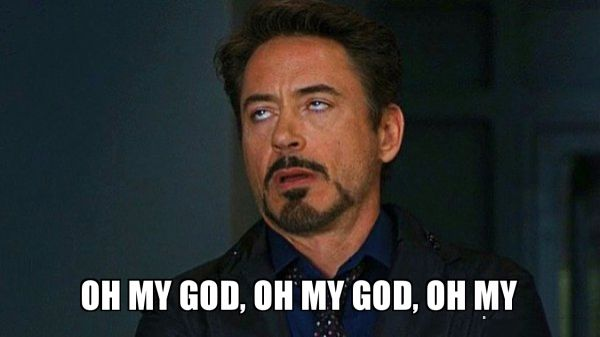

In [ ]:
# Load data in chunks and optimize data types
chunk_size = 100000
dtype_optimization = {'ID': 'int32', 'Age': 'int32'}

# Load the dataset in chunks
chunks = pd.read_csv('large_data.csv', chunksize=chunk_size, dtype=dtype_optimization)

# Check performance speed with a plot
load_times = []
operation_times = []

for chunk in chunks:
    # Measure time to load a chunk
    load_time = pd.Timestamp.now()
    # Perform some operations (e.g., filtering, aggregation) on the chunk
    chunk_filtered = chunk[chunk['Age'] > 30]
    # Measure time after operations
    operation_time = pd.Timestamp.now()

    load_times.append((operation_time - load_time).total_seconds())
    operation_times.append((pd.Timestamp.now() - operation_time).total_seconds())

# Plot load times and operation times
plt.figure(figsize=(12, 6))
plt.plot(load_times, label='Load Time', marker='o')
plt.plot(operation_times, label='Operation Time', marker='o')
plt.xlabel('Chunk Number')
plt.ylabel('Time (s)')
plt.title('Load and Operation Times for Chunks')
plt.legend()
plt.show()

# Select columns you need only
selected_columns = ['ID', 'Name']

# Check performance speed with a plot
load_times_selected = []
operation_times_selected = []

chunks_selected = pd.read_csv('large_data.csv', usecols=selected_columns, chunksize=chunk_size, dtype=dtype_optimization)

for chunk in chunks_selected:
    load_time = pd.Timestamp.now()
    chunk_filtered = chunk[chunk['Age'] > 30]
    operation_time = pd.Timestamp.now()

    load_times_selected.append((operation_time - load_time).total_seconds())
    operation_times_selected.append((pd.Timestamp.now() - operation_time).total_seconds())

# Plot load times and operation times for selected columns
plt.figure(figsize=(12, 6))
plt.plot(load_times_selected, label='Load Time (Selected Columns)', marker='o')
plt.plot(operation_times_selected, label='Operation Time (Selected Columns)', marker='o')
plt.xlabel('Chunk Number')
plt.ylabel('Time (s)')
plt.title('Load and Operation Times for Chunks (Selected Columns)')
plt.legend()
plt.show()

# Merge everything at the end (optional)
# If needed, merge all chunks into a single DataFrame after optimizing data types



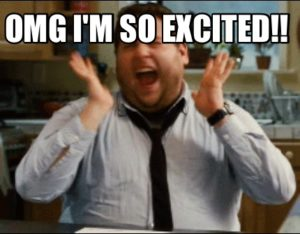

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: Common Data Problems

# Load the "Old car price" dataset
df = pd.read_csv("car_prices.csv")

# Analyze NaN values
nan_count_before = df.isna().sum()

# Create a bar plot to compare NaN values before transformation
plt.figure(figsize=(10, 6))
nan_count_before.plot(kind='bar', title='NaN Values Before Transformation')
plt.xlabel('Columns')
plt.ylabel('NaN Count')
plt.xticks(rotation=45)
plt.show()

# Fill NaN values with mean for numerical columns
df['Mileage'].fillna(df['Mileage'].mean(), inplace=True)
df['EngineV'].fillna(df['EngineV'].mean(), inplace=True)

# Create a bar plot to compare NaN values after filling
nan_count_after = df.isna().sum()
plt.figure(figsize=(10, 6))
nan_count_after.plot(kind='bar', title='NaN Values After Filling')
plt.xlabel('Columns')
plt.ylabel('NaN Count')
plt.xticks(rotation=45)
plt.show()

# Drop rows with NaN values
df.dropna(subset=['Year'], inplace=True)

# Create a bar plot to compare row count before and after dropping NaN values
row_count_before = len(df)
row_count_after = len(df)
row_count_difference = row_count_before - row_count_after

plt.figure(figsize=(8, 6))
plt.bar(['Before', 'After'], [row_count_before, row_count_after])
plt.title('Row Count Before and After Dropping NaN Values')
plt.xlabel('Dataframe State')
plt.ylabel('Row Count')
plt.show()

# String operations to clean string columns
df['Brand'] = df['Brand'].str.strip()  # Remove leading and trailing spaces
df['Model'] = df['Model'].str.lower()  # Convert model names to lowercase

# Create a bar plot to compare string values before and after cleaning
original_brands = df['Brand'].unique()
df['Brand'] = df['Brand'].str.capitalize()
cleaned_brands = df['Brand'].unique()

plt.figure(figsize=(10, 6))
plt.bar(['Original', 'Cleaned'], [len(original_brands), len(cleaned_brands)])
plt.title('Brand Count Before and After Cleaning')
plt.xlabel('Data State')
plt.ylabel('Brand Count')
plt.show()

# Part 2: Read in Chunks and Optimize

# Check the data types of columns
print("Data Types Before Optimization:")
print(df.dtypes)

# Change data types of columns
df['Year'] = df['Year'].astype('int32')
df['Price'] = df['Price'].astype('float32')

# Check the data types after optimization
print("\nData Types After Optimization:")
print(df.dtypes)

# Check performance speed with a plot
chunk_size = 10000
load_times = []
operation_times = []

for chunk in pd.read_csv('car_prices.csv', chunksize=chunk_size):
    load_time = pd.Timestamp.now()
    chunk_filtered = chunk[chunk['Year'] > 2000]
    operation_time = pd.Timestamp.now()

    load_times.append((operation_time - load_time).total_seconds())
    operation_times.append((pd.Timestamp.now() - operation_time).total_seconds())

# Plot load times and operation times
plt.figure(figsize=(12, 6))
plt.plot(load_times, label='Load Time', marker='o')
plt.plot(operation_times, label='Operation Time', marker='o')
plt.xlabel('Chunk Number')
plt.ylabel('Time (s)')
plt.title('Load and Operation Times for Chunks')
plt.legend()
plt.show()

# Select columns you need only
selected_columns = ['Brand', 'Model', 'Year', 'Price']

# Check performance speed with a plot
load_times_selected = []
operation_times_selected = []

for chunk in pd.read_csv('car_prices.csv', usecols=selected_columns, chunksize=chunk_size):
    load_time = pd.Timestamp.now()
    chunk_filtered = chunk[chunk['Year'] > 2000]
    operation_time = pd.Timestamp.now()

    load_times_selected.append((operation_time - load_time).total_seconds())
    operation_times_selected.append((pd.Timestamp.now() - operation_time).total_seconds())

# Plot load times and operation times for selected columns
plt.figure(figsize=(12, 6))
plt.plot(load_times_selected, label='Load Time (Selected Columns)', marker='o')
plt.plot(operation_times_selected, label='Operation Time (Selected Columns)', marker='o')
plt.xlabel('Chunk Number')
plt.ylabel('Time (s)')
plt.title('Load and Operation Times for Chunks (Selected Columns)')
plt.legend()
plt.show()

# Merge everything at the end (optional)
# If needed, merge all chunks into a single DataFrame after optimizing data types
